In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import numpy as np

# What Is PyTorch?

PyTorch is an open-source machine learning framework widely used for **building and training neural networks**. It provides a flexible and intuitive way to work with tensors—the fundamental data structures in deep learning—and offers powerful tools for automatic differentiation, which makes implementing and optimizing models much easier. PyTorch is also deeply integrated with GPU acceleration through CUDA, allowing it to run complex mathematical operations extremely quickly.

# Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data.

## Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa).

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1562, 0.3484],
        [0.7965, 0.9809]]) 



## Attributes of a tensor

In [5]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Device

By default, tensors are created on the CPU. We need to explicitly move tensors to the accelerator using `.to` method (after checking for accelerator availability).

In [6]:
# One way
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(f"Using {device} device")

tensor = torch.rand(3,4)
print(f'Tensor after init: {tensor}')
tensor = tensor.to(device)
print(f'Tensor after moving to accelerator: {tensor}')


Using mps device
Tensor after init: tensor([[0.8644, 0.0203, 0.0262, 0.3548],
        [0.2166, 0.8996, 0.4237, 0.8387],
        [0.9256, 0.4339, 0.5357, 0.2751]])
Tensor after moving to accelerator: tensor([[0.8644, 0.0203, 0.0262, 0.3548],
        [0.2166, 0.8996, 0.4237, 0.8387],
        [0.9256, 0.4339, 0.5357, 0.2751]], device='mps:0')


In [7]:
# Another way
# .current_accelerator() -> Object representing the current accelerator
# .current_accelerator().type -> Type of the current accelerator as a string
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


## Operations on Tensors

### Joining tensors

In [8]:
t1 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[[0.8644, 0.0203, 0.0262, 0.3548],
         [0.8644, 0.0203, 0.0262, 0.3548],
         [0.8644, 0.0203, 0.0262, 0.3548]],

        [[0.2166, 0.8996, 0.4237, 0.8387],
         [0.2166, 0.8996, 0.4237, 0.8387],
         [0.2166, 0.8996, 0.4237, 0.8387]],

        [[0.9256, 0.4339, 0.5357, 0.2751],
         [0.9256, 0.4339, 0.5357, 0.2751],
         [0.9256, 0.4339, 0.5357, 0.2751]]], device='mps:0')


### Squeeze and unsqueeze

In [9]:
t = torch.tensor([1, 2, 3, 4, 5])
print(t.shape)

# _ indicates that the operation is done in-place
t.unsqueeze_(0) # adds a dimension of size 1 at index 0
print(t.shape)

t.unsqueeze_(1) # adds a dimension of size 1 at index 1
print(t.shape)

t.squeeze_() # removes all dimensions of size 1, but if you want to remove a specific dimension, you can pass the dimension index as an argument
print(t.shape)

torch.Size([5])
torch.Size([1, 5])
torch.Size([1, 1, 5])
torch.Size([5])


### Arithmetic operations

In [10]:
tensor = torch.arange(1,5, dtype=torch.float32)
tensor = tensor.to(device)
tensor

tensor([1., 2., 3., 4.], device='mps:0')

In [11]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

print(y1, y2, y3)

tensor(30., device='mps:0') tensor(30., device='mps:0') tensor(30., device='mps:0')


/var/folders/30/p871csfd59bg0hq53w_t9pw80000gn/T/ipykernel_2163/3136201191.py:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:4419.)
  y1 = tensor @ tensor.T


In [12]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(z1, z2, z3)

tensor([ 1.,  4.,  9., 16.], device='mps:0') tensor([ 1.,  4.,  9., 16.], device='mps:0') tensor([ 1.,  4.,  9., 16.], device='mps:0')


## Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

### Tensor to NumPy array

In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.

In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### Numpy array to Tensor

In [15]:
n = np.ones(5)
print(f"n: {n}")
t = torch.from_numpy(n)
print(f"t: {t}")

n: [1. 1. 1. 1. 1.]
t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Changes in the NumPy array reflects in the tensor.

In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Automatic Differentiation (Autograd)

We use PyTorch’s **autograd** system to automatically compute derivatives of mathematical expressions.

In [17]:
x = torch.tensor(2.0, requires_grad=True)
y = x**3 + 2*x
y.backward()
print(x.grad)

tensor(14.)


* `requires_grad=True`
  This tells PyTorch to **track all operations** performed on `x`, because we want to compute gradients with respect to this variable.

* `y = x**3 + 2*x`
  We build a computation graph.
  Here, `y` is a function of `x`:
  $
  y = x^3 + 2x
  $
  PyTorch remembers every step, so it can compute the derivative later.

* `y.backward()`
  This triggers **backpropagation**.
  PyTorch computes the derivative:
  $
  \frac{dy}{dx} = 3x^2 + 2
  $
  and then substitutes `x = 2`, so:
  $
  3 \cdot 2^2 + 2 = 12 + 2 = 14
  $

* `print(x.grad)`
  The computed gradient is stored in `x.grad`.
  So the output will be 14.

# Dataset

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)). 

In this tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.


In [18]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

## Creating a Custom Dataset for Your Own Files

When working with your own images, text files, or any custom data, PyTorch allows you to create a **custom Dataset class**. This class must implement **three required methods**:

* `__init__`
* `__len__`
* `__getitem__`


**`__init__` – Initialization**

Runs **once** when the dataset is created.
It loads:

* the files with data and labels,
* any transformations.

**`__len__` – Dataset Size**

Returns the number of items in the dataset.

**`__getitem__` – Accessing One Sample**

This method:

1. Builds the data path
2. Loads the data
3. Reads the data
4. Applies transformations
5. Returns `(data, label)`

In [19]:
# Nothing important, just converting the datasets to JPG images and saving labels to CSV files...
import os
import pandas as pd
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from PIL import Image

# Create output directories
output_dir = "fashionmnist_jpg"
train_img_dir = os.path.join(output_dir, "train")
test_img_dir = os.path.join(output_dir, "test")

os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(test_img_dir, exist_ok=True)

# Convert training set to JPG + labels.csv
train_records = []

for idx, (img, label) in enumerate(training_data):
    pil_img = transforms.ToPILImage()(img)
    
    filename = f"img_{idx:06d}.jpg"
    filepath = os.path.join(train_img_dir, filename)
    
    pil_img.save(filepath)
    train_records.append([filename, label])

train_df = pd.DataFrame(train_records, columns=["filename", "label"])
train_df.to_csv(os.path.join(output_dir, "train_labels.csv"), index=False)

print("Saved training set:", len(train_df), "images")

# Convert test set to JPG + labels.csv
test_records = []

for idx, (img, label) in enumerate(test_data):
    pil_img = transforms.ToPILImage()(img)
    
    filename = f"img_{idx:06d}.jpg"
    filepath = os.path.join(test_img_dir, filename)
    
    pil_img.save(filepath)
    test_records.append([filename, label])

test_df = pd.DataFrame(test_records, columns=["filename", "label"])
test_df.to_csv(os.path.join(output_dir, "test_labels.csv"), index=False)

print("Saved test set:", len(test_df), "images")

Saved training set: 60000 images
Saved test set: 10000 images


In [20]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        # Load CSV file with labels
        self.img_labels = pd.read_csv(annotations_file)
        
        # Directory containing images
        self.img_dir = img_dir
        
        # Optional transforms
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        # Total number of samples in the dataset
        return len(self.img_labels)

    def __getitem__(self, idx):
        # Build the full image path
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        
        # Load the image and convert to tensor
        image = decode_image(img_path)
        
        # Read the label
        label = self.img_labels.iloc[idx, 1]
        
        # Apply transforms (if any)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        
        return image, label


# Dataloader

We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
64, i.e. each element in the dataloader iterable will return a batch of
64 features and labels.


In [21]:
from torch.utils.data import random_split, DataLoader

batch_size = 64

train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size

train_dataset, val_dataset = random_split(training_data, [train_size, val_size])

# DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader   = DataLoader(val_dataset,   batch_size=batch_size)
test_dataloader  = DataLoader(test_data,     batch_size=batch_size)

# Checking the data shapes
for X, y in val_dataloader:
    print("Val shapes:")
    print(f"X: {X.shape}, y: {y.shape}")
    break

Val shapes:
X: torch.Size([64, 1, 28, 28]), y: torch.Size([64])


Creating Models
===============

To define a neural network in PyTorch, we create a class that inherits
from
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the
[accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
such as CUDA, MPS, MTIA, or XPU. If the current accelerator is
available, we will use it. Otherwise, we use the CPU.


In [22]:
# Define MLP model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()             # [batch, channels, height, width] → [batch, channels * height * width]
        self.linear_relu_stack = nn.Sequential( # sequence of layers
            nn.Linear(28*28, 512),              # fully connected layer
            nn.ReLU(),                          # activation function
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [23]:
import torch.nn as nn
import torch.nn.functional as F

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn_model = CNN()
print(cnn_model)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Optimizing the Model Parameters
===============================

To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).


In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Training a Neural Network

Training a neural network is an **iterative optimization process**. The goal is to adjust the model’s weights so that its predictions match the target labels as closely as possible. Each training iteration consists of a fixed sequence of operations.

The entire training loop is built from four essential components:

## Forward Pass

The forward pass is when data flows **from input → through layers → to output**.

* The model receives a batch of input data.
* Each layer performs computations (linear transformations, convolutions, activations).
* The network produces a prediction `ŷ`.

```python
outputs = model(inputs)   # forward pass
```

During this step:

* PyTorch **records the operations** used to compute the output.
* This computation graph is required for calculating gradients later.

## Loss Function

The loss function measures **how wrong** the model’s prediction is.

Common examples:

* `CrossEntropyLoss` → classification
* `MSELoss` → regression

The loss is a single scalar value.

```python
loss = loss_fn(outputs, labels)
```

## Backward Pass (Gradient Computation)

This is the key step where **gradients are calculated**.

When we call:

```python
loss.backward()
```

PyTorch automatically:

* walks backward through the computation graph,
* applies the chain rule,
* computes ∂loss/∂parameter for **every trainable weight**.

**Where is the gradient stored?**

For each parameter `p` in the model:

* its gradient is stored in `p.grad`.

So after `loss.backward()`:

```python
for name, param in model.named_parameters():
    print(name, param.grad)  # gradient for each weight
```

This is **the moment the gradient is computed**.

## Optimizer Step (Updating Weights)

The optimizer uses the gradients to update the weights.

Example:

```python
optimizer.step()
```

This usually performs something like:

```
new_weight = old_weight - learning_rate * gradient
```

PyTorch supports many optimizers:

* SGD
* Adam
* RMSprop
  …

## Zeroing Gradients

Gradients accumulate by default in PyTorch, so before each backward pass we must clear old gradients:

```python
optimizer.zero_grad()
```

This ensures correctness — otherwise gradients from previous batches would add up.

## Putting It All Together — Full Training Loop

```python
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        
        # 1. Forward pass
        outputs = model(inputs)

        # 2. Compute loss
        loss = loss_fn(outputs, labels)

        # 3. Backward pass → compute gradients
        loss.backward()

        # 4. Update parameters
        optimizer.step()

        # 5. Reset gradients
        optimizer.zero_grad()
```

This loop repeats for many epochs until the model learns the desired mapping.

In a single training loop, the model makes predictions on the training
dataset (fed to it in batches), and backpropagates the prediction error
to adjust the model\'s parameters.


In [25]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model\'s performance against the test dataset to
ensure it is learning.


In [ ]:
# Evaluation function
# Looks similar to train loop, but no backpropagation
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # Set the model to evaluation mode: disables dropout, batchnorm, etc.
    test_loss, correct = 0, 0
    with torch.no_grad(): # No need to track gradients during evaluation
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item() # .item() gets the scalar value from a single-value tensor
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.


In [27]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.314672  [   64/48000]
loss: 2.291754  [ 6464/48000]
loss: 2.284351  [12864/48000]
loss: 2.261134  [19264/48000]
loss: 2.258878  [25664/48000]
loss: 2.229407  [32064/48000]
loss: 2.213397  [38464/48000]
loss: 2.214386  [44864/48000]
Test Error: 
 Accuracy: 28.5%, Avg loss: 2.197219 

Epoch 2
-------------------------------
loss: 2.198637  [   64/48000]
loss: 2.151835  [ 6464/48000]
loss: 2.155766  [12864/48000]
loss: 2.141913  [19264/48000]
loss: 2.133244  [25664/48000]
loss: 2.085191  [32064/48000]
loss: 2.086065  [38464/48000]
loss: 2.013712  [44864/48000]
Test Error: 
 Accuracy: 48.1%, Avg loss: 2.018729 

Epoch 3
-------------------------------
loss: 2.004170  [   64/48000]
loss: 1.999902  [ 6464/48000]
loss: 1.990087  [12864/48000]
loss: 1.896149  [19264/48000]
loss: 1.896215  [25664/48000]
loss: 1.874332  [32064/48000]
loss: 1.798421  [38464/48000]
loss: 1.733547  [44864/48000]
Test Error: 
 Accuracy: 56.0%, Avg loss: 1.739997 

Epoc

In [28]:
# Final test on test dataset
test(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 63.5%, Avg loss: 1.258632 



Saving Models
=============

A common way to save a model is to serialize the internal state
dictionary (containing the model parameters).


In [29]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
==============

The process for loading a model includes re-creating the model structure
and loading the state dictionary into it.


In [30]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

This model can now be used to make predictions.


In [31]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


# Image Processing in PyTorch

PyTorch provides a rich set of tools for working with images, especially through the **`torchvision`** library. One of its most powerful features is the wide collection of **image transforms**, which allow us to resize, crop, normalize, rotate, flip, or otherwise modify images before feeding them into a neural network. These transformations are crucial both for *preprocessing* (converting images into proper tensor formats and normalizing them) and for *data augmentation* (random modifications that help the model generalize better). PyTorch handles image tensors efficiently and is widely used for training convolutional neural networks (CNNs), making it an excellent framework for computer vision tasks such as classification, object detection, and segmentation. Because transforms can be combined into pipelines, it becomes easy to build robust datasets that improve training stability and overall model performance.

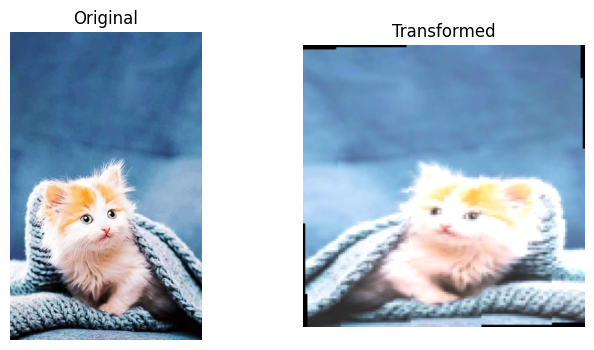

In [32]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load image
img = Image.open("cat.jpg")   # path to a local image

# Define a list of transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=1.0),  # always flip for demonstration
    transforms.ColorJitter(brightness=0.5, contrast=0.5),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

# Apply transforms
transformed_img = transform(img)

# Convert tensor back to displayable format
to_pil = transforms.ToPILImage()
transformed_img_pil = to_pil(transformed_img)

# Show results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Transformed")
plt.imshow(transformed_img_pil)
plt.axis("off")

plt.show()

# Pretrained Models

Modern deep learning projects rarely start from scratch. Instead of training a neural network from random initialization, we often use a **pretrained model** — a model whose weights were already trained on a large dataset. PyTorch makes this extremely easy through libraries such as **torchvision**, **torchtext**, and **torchaudio**, as well as the broader **HuggingFace ecosystem**.

Pretrained models allow us to:

* reuse knowledge learned from huge datasets,
* speed up training,
* achieve better accuracy with less data,
* avoid the need for large compute resources.

## What Is a Pretrained Model?

A pretrained model is a neural network whose parameters (weights) were trained on a **large, general-purpose dataset**. For example:

* Vision models: ImageNet (1.2M labeled images, 1000 classes)
* NLP models: large text corpora (Wikipedia, BookCorpus, Common Crawl)
* Audio models: speech datasets like LibriSpeech

After training, the final weight values are saved and distributed so we can use them.

Instead of starting from random numbers, we begin with learned representations.

## Why Use Pretrained Models?

### Faster training

Most of the feature extraction is already learned.

### Better accuracy

Pretrained networks capture general patterns (edges, shapes, language structure).

### Useful when you have *small datasets*

Transfer learning is extremely powerful with limited training data.

### Lower cost

Training modern large models from scratch is extremely expensive (GPU time, energy, data scale).

### Standardized and reliable

Researchers test and validate pretrained models extensively.

## Using a Pretrained Model in PyTorch

The simplest example: loading a pretrained ResNet for image classification.

In [33]:
from torchvision.models import resnet18

model = resnet18(weights="IMAGENET1K_V1")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

The model is now ready for inference: predicting labels for new images.

## Transfer Learning: Adapting a Pretrained Network

Most pretrained models are used for **transfer learning**, meaning we keep the learned feature extractor but replace the final classification layer.

Example:

In [34]:
from torchvision.models import resnet18
import torch.nn as nn

model = resnet18(weights="IMAGENET1K_V1")

# Replace final layer for 10-class problem
model.fc = nn.Linear(model.fc.in_features, 10)

Now the model can be trained on a new dataset.

## Feature Extraction (Freezing Layers)

Another common technique is to **freeze** pretrained layers and use the network only to extract features:

In [35]:
for param in model.parameters():
    param.requires_grad = False

Then only the new head is trainable.

This is helpful when your dataset is small or training resources are limited.

## Using Pretrained Models in NLP (HuggingFace Example)

In [36]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

text = "PyTorch is a powerful deep learning framework."
inputs = tokenizer(text, return_tensors="pt")

outputs = model(**inputs)
outputs.last_hidden_state

tensor([[[-0.4529, -0.2995,  0.0663,  ..., -0.3073, -0.1916,  0.7041],
         [ 0.0796, -0.5890,  0.6374,  ..., -0.0592,  0.4665,  0.8774],
         [ 0.3585, -0.4338,  0.9728,  ..., -0.1281, -0.1179, -0.1297],
         ...,
         [ 0.1796,  0.3397,  0.1053,  ..., -0.4886, -0.2532, -0.0387],
         [ 0.5917,  0.1370, -0.2535,  ...,  0.1332, -0.8564, -0.0792],
         [ 0.4125,  0.2051, -0.0995,  ...,  0.1852, -0.9804, -0.0407]]],
       grad_fn=<NativeLayerNormBackward0>)

`outputs.last_hidden_state` contains contextual embeddings for each word.

# Bibliography

[Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)